#### Context    
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?    
> If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela    
>     
> Greetings!    
>     
#### Content    
> 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!    
>     
> scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Família    
>     
> 14 variables    
>     
#### Data Dictionary    
> 01 - PatientId    
> Identification of a patient    
> 02 - AppointmentID    
> Identification of each appointment    
> 03 - Gender    
> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.    
> 04 - ScheduledDay    
> The day of the actuall appointment, when they have to visit the doctor.    
> 05 - AppointmentDay   
> The day someone called or registered the appointment, this is before appointment of course.    
> 06 - Age    
> How old is the patient.    
> 07 - Neighbourhood    
> Where the appointment takes place.    
> 08 - Scholarship    
> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Família    
> 09 - Hipertension    
> True or False    
> 10 - Diabetes    
> True or False    
> Alcoholism    
> True or False    
> Handcap    
> True or False    
> SMS_received    
> 1 or more messages sent to the patient.    
> No-show    
> True or False.    
> Inspiration    
> What if that possible to predict someone to no-show an appointment?    


#### 1- Gerekli paketleri yükleyelim

In [1]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio

import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('Data/KaggleV2-May-2016.csv',  low_memory=False)

title_style = {'family': 'DejaVu Sans', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'DejaVu Sans', 'color': 'darkblue', 'size': 15 }

In [2]:
df.sort_values(by=['Age'])
#Yaşları küçükten büyüğe listeliyorum

PatientId  AppointmentID Gender          ScheduledDay  \
99832   4.659432e+14        5775010      F  2016-06-06T08:58:13Z   
34218   3.469431e+12        5649465      F  2016-05-03T06:57:26Z   
102834  4.882675e+10        5659726      F  2016-05-04T14:35:59Z   
102832  9.726846e+12        5749887      F  2016-05-31T08:19:38Z   
102830  2.845290e+13        5664173      M  2016-05-05T11:24:09Z   
...              ...            ...    ...                   ...   
63915   3.196321e+13        5700279      F  2016-05-16T09:17:44Z   
76284   3.196321e+13        5744037      F  2016-05-30T09:44:51Z   
68127   3.196321e+13        5562812      F  2016-04-08T14:29:17Z   
63912   3.196321e+13        5700278      F  2016-05-16T09:17:44Z   
97666   7.482346e+14        5717451      F  2016-05-19T07:57:56Z   

              AppointmentDay  Age  Neighbourhood  Scholarship  Hipertension  \
99832   2016-06-06T00:00:00Z   -1          ROMÃO            0             0   
34218   2016-05-09T00:00:00Z    0       REDENÇÃO            0             0   
102834  2016-06-01T00:00:00Z    0        MARUÍPE            0             0   
102832  2016-06-01T00:00:00Z    0        MARUÍPE            0             0   
102830  2016-06-08T00:00:00Z    0  SÃO CRISTÓVÃO            0             0   
...                      ...  ...            ...          ...           ...   
63915   2016-05-19T00:00:00Z  115     ANDORINHAS            0             0   
76284   2016-05-30T00:00:00Z  115     ANDORINHAS            0             0   
68127   2016-05-16T00:00:00Z  115     ANDORINHAS            0             0   
63912   2016-05-19T00:00:00Z  115     ANDORINHAS            0             0   
97666   2016-06-03T00:00:00Z  115       SÃO JOSÉ            0             1   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832          0           0        0             0      No  
34218          0           0        0             0     Yes  
102834         0           0        0             1      No  
102832         0           0        0             0      No  
102830         0           0        0             1      No  
...          ...         ...      ...           ...     ...  
63915          0           0        1             0     Yes  
76284          0           0        1             0      No  
68127          0           0        1             0     Yes  
63912          0           0        1             0     Yes  
97666          0           0        0             1      No  

[110527 rows x 14 columns]

### Checking for errors and NaNs


#### 2- 'Yaş' kolonunda -1 değerlerini atalım.

In [3]:
df=df[df['Age']>=0]

#### 3-NaN veri Kontrolü

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df[pd.isnull(df).any(axis=1)]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### 4-Object Tipleri Dönüştürelim

In [7]:
df =df.replace({'No-show': {'Yes': True, 'No': False}})

In [8]:
df =df.replace({'Gender': {'F': 0, 'M': 1}})

#### AppointmentDay ve ScheduledDay tipi object. Bunları datetime formatına dönüştürelim

In [9]:
df['AppointmentDay']=pd.to_datetime(df["AppointmentDay"])
df['ScheduledDay']=pd.to_datetime(df["ScheduledDay"])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 5-Kategorik değişkenleri belirleyelim:

In [11]:
df.nunique() 

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
df.describe(include=['O'])

Neighbourhood
count           110526
unique              81
top     JARDIM CAMBURI
freq              7717

In [13]:
df.describe()


PatientId  AppointmentID         Gender            Age  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06       0.350026      37.089219   
std    2.560943e+14   7.129544e+04       0.476980      23.110026   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06       0.000000      18.000000   
50%    3.173184e+13   5.680572e+06       0.000000      37.000000   
75%    9.438963e+13   5.725523e+06       1.000000      55.000000   
max    9.999816e+14   5.790484e+06       1.000000     115.000000   

         Scholarship   Hipertension       Diabetes     Alcoholism  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.098266       0.197248       0.071865       0.030400   
std         0.297676       0.397923       0.258266       0.171686   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Handcap   SMS_received  
count  110526.000000  110526.000000  
mean        0.022248       0.321029  
std         0.161543       0.466874  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max         4.000000       1.000000

In [14]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

#### 6-Katılım Oranları (No:Katıldı, Yes:Katılmadı)

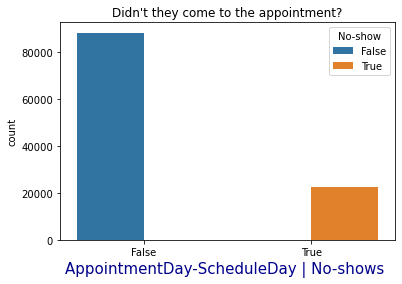

In [15]:
colors = ['lightcoral','yellowgreen']

ax2 = sns.countplot(x="No-show", hue="No-show", data=df)
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)


plt.show()

#### Randevuya Katılım Oranı Yüzdesi

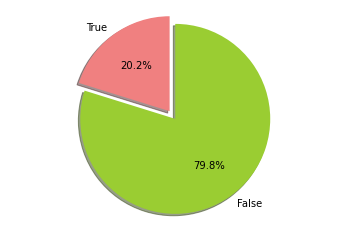

In [16]:
nstrue=df[df["No-show"]==True]["No-show"].count()
nstruepercent=nstrue/df["No-show"].count()*100
nsfalsepercent=100-nstruepercent



labels = 'True', 'False'
sizes = [nstruepercent, nsfalsepercent]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#### 7-Randevuya katılmayan kadın ve erkeklerin yüzdesini hesaplayalım

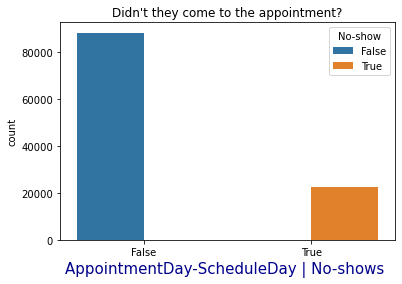

In [17]:
ax = sns.countplot(x="No-show", hue="No-show", data=df)
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)
plt.show()

In [18]:
df.groupby("Gender")["Gender"].count()

Gender
0    71839
1    38687
Name: Gender, dtype: int64

#### 8-Cinsiyete Göre Randevulara Katılım Oranları

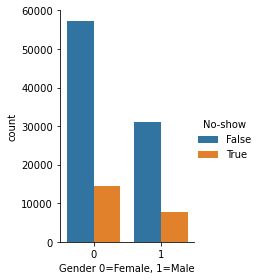

In [19]:
g = sns.catplot(x="Gender", hue="No-show",
                data=df, kind="count",
                height=4, aspect=.7);
g.set(xlabel='Gender 0=Female, 1=Male')
plt.show()

In [20]:
totalf=df.groupby("Gender")["Gender"].count()[0]  ##Total Female
totalm=df.groupby("Gender")["Gender"].count()[1]  ##Total Male

yesf=df[df['No-show']==True].groupby("Gender")["Gender"].count()[0]
yesm=df[df['No-show']==True].groupby("Gender")["Gender"].count()[1]
yespercentagef=yesf/(totalf)*100
yespercentagem=yesm/(totalm)*100


#### 9-Cinsiyete Göre Randevulara Katılmama Oranı

In [21]:
print("Percentage of female not attending the appointment")
print(yespercentagef)

print("Percentage of male not attending the appointment")
print(yespercentagem)


Percentage of female not attending the appointment
20.314870752655242
Percentage of male not attending the appointment
19.967947889471915


> Randevulara gelen kadın ve erkek oranlarında pek bir fark yok

In [22]:
(df.AppointmentDay)-(df.ScheduledDay)

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

#### 10-Randevular kaç gün önce alınmış ?

In [23]:
df["days"]=(df["AppointmentDay"]-df["ScheduledDay"]).dt.days
df.sort_values(by=['days'])


PatientId  AppointmentID  Gender              ScheduledDay  \
71533   9.982316e+14        5686628       0 2016-05-11 13:49:20+00:00   
72362   3.787482e+12        5655637       1 2016-05-04 06:50:57+00:00   
64175   2.425226e+13        5664962       0 2016-05-05 13:43:58+00:00   
55226   7.896294e+12        5715660       0 2016-05-18 14:50:41+00:00   
27033   7.839273e+12        5679978       1 2016-05-10 10:51:53+00:00   
...              ...            ...     ...                       ...   
102789  3.112342e+13        5134239       0 2015-12-07 10:44:25+00:00   
102788  2.547555e+14        5134249       0 2015-12-07 10:45:01+00:00   
102786  4.542871e+11        5134227       1 2015-12-07 10:43:34+00:00   
102792  3.512659e+14        5134233       1 2015-12-07 10:44:07+00:00   
102795  1.216587e+12        5134197       0 2015-12-07 10:40:59+00:00   

                  AppointmentDay  Age  Neighbourhood  Scholarship  \
71533  2016-05-05 00:00:00+00:00   81  SANTO ANTÔNIO            0   
72362  2016-05-03 00:00:00+00:00    7     TABUAZEIRO            0   
64175  2016-05-04 00:00:00+00:00   22     CONSOLAÇÃO            0   
55226  2016-05-17 00:00:00+00:00   19  SANTO ANTÔNIO            0   
27033  2016-05-09 00:00:00+00:00   38    RESISTÊNCIA            0   
...                          ...  ...            ...          ...   
102789 2016-06-03 00:00:00+00:00   60  SÃO CRISTÓVÃO            0   
102788 2016-06-03 00:00:00+00:00   63  SÃO CRISTÓVÃO            0   
102786 2016-06-03 00:00:00+00:00   67        MARUÍPE            0   
102792 2016-06-03 00:00:00+00:00   73        MARUÍPE            0   
102795 2016-06-03 00:00:00+00:00   27  SÃO CRISTÓVÃO            1   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
71533              0         0           0        0             0     True   
72362              0         0           0        0             0     True   
64175              0         0           0        0             0     True   
55226              0         0           0        1             0     True   
27033              0         0           0        1             0     True   
...              ...       ...         ...      ...           ...      ...   
102789             1         1           0        0             1    False   
102788             1         1           0        0             1    False   
102786             1         1           0        0             0    False   
102792             1         1           0        1             0     True   
102795             0         0           0        0             1     True   

        days  
71533     -7  
72362     -2  
64175     -2  
55226     -2  
27033     -2  
...      ...  
102789   178  
102788   178  
102786   178  
102792   178  
102795   178  

[110526 rows x 15 columns]

#### "days" kolonunda negatif olan değerlerin Aynı gün randevu alınmış gibi varsayıyorum

In [24]:
negativedays=df["days"]


In [25]:
negativedays[negativedays<0]=0
df["days"]=negativedays

In [26]:
df.sort_values(by=['days'])

PatientId  AppointmentID  Gender              ScheduledDay  \
0       2.987250e+13        5642903       0 2016-04-29 18:38:08+00:00   
59680   4.857719e+13        5708254       0 2016-05-17 10:53:42+00:00   
59681   8.943385e+14        5707946       1 2016-05-17 10:22:48+00:00   
59682   5.224722e+13        5708178       0 2016-05-17 10:43:06+00:00   
59683   8.985873e+13        5708169       1 2016-05-17 10:42:19+00:00   
...              ...            ...     ...                       ...   
102790  9.965348e+14        5134243       1 2015-12-07 10:44:40+00:00   
102789  3.112342e+13        5134239       0 2015-12-07 10:44:25+00:00   
102788  2.547555e+14        5134249       0 2015-12-07 10:45:01+00:00   
102786  4.542871e+11        5134227       1 2015-12-07 10:43:34+00:00   
102796  9.582232e+12        5134223       0 2015-12-07 10:43:01+00:00   

                  AppointmentDay  Age    Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0   
59680  2016-05-17 00:00:00+00:00   72      SANTA LUÍZA            0   
59681  2016-05-17 00:00:00+00:00   23   PRAIA DO CANTO            0   
59682  2016-05-17 00:00:00+00:00   27   PRAIA DO CANTO            0   
59683  2016-05-17 00:00:00+00:00    0   BARRO VERMELHO            0   
...                          ...  ...              ...          ...   
102790 2016-06-03 00:00:00+00:00   73          MARUÍPE            0   
102789 2016-06-03 00:00:00+00:00   60    SÃO CRISTÓVÃO            0   
102788 2016-06-03 00:00:00+00:00   63    SÃO CRISTÓVÃO            0   
102786 2016-06-03 00:00:00+00:00   67          MARUÍPE            0   
102796 2016-06-03 00:00:00+00:00   80    SÃO CRISTÓVÃO            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
0                  1         0           0        0             0    False   
59680              0         0           0        0             0    False   
59681              0         0           0        0             0    False   
59682              0         0           0        0             0    False   
59683              0         0           0        0             0    False   
...              ...       ...         ...      ...           ...      ...   
102790             1         1           0        0             0    False   
102789             1         1           0        0             1    False   
102788             1         1           0        0             1    False   
102786             1         1           0        0             0    False   
102796             1         1           0        0             1    False   

        days  
0          0  
59680      0  
59681      0  
59682      0  
59683      0  
...      ...  
102790   178  
102789   178  
102788   178  
102786   178  
102796   178  

[110526 rows x 15 columns]

#### 11-Gün farkına göre randevuya katılım oranları 

In [27]:
noshowy=df[df['No-show']==True]["days"]

noshown=df[df['No-show']==False]["days"]

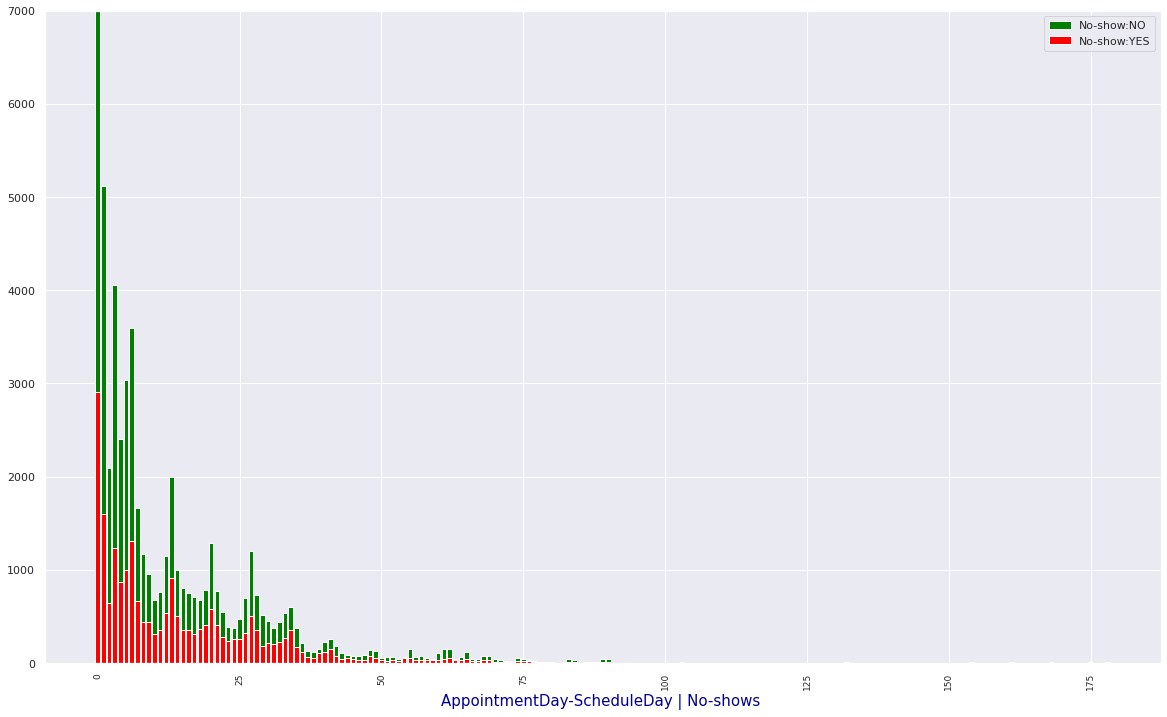

In [28]:
sns.set()
plt.figure(figsize=(20, 12))

plt.subplot(1,1,1)
plt.bar(noshown.value_counts().index,noshown.value_counts(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-show:NO ',fontdict = axis_style)

plt.subplot(1,1,1)
plt.bar(noshowy.value_counts().index,noshowy.value_counts(), color = "RED",label = 'No-show:YES')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)
plt.ylim(0,7000)
plt.legend()



plt.show() #s smote

> Aynı gün alınan randevulara katılım oranının daha yüksek olduğunu görüyoruz.

In [29]:
plt.figure(figsize=(20, 20))
dayrate=noshown.value_counts()/(noshown.value_counts()+noshowy.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=dayrate.index, 
             y=dayrate.values,title="Percentage of customers not attending the daily appointment",
                 labels={"index": "How many days ago",  
                         "y": "rate of attending to appointment"})

fig.show()



<Figure size 1440x1440 with 0 Axes>

In [30]:
def daycategories(day):
    if day==0: return "high"
    elif day<10: return "middle"
    elif day<24: return "low"
    else: return "uncertain"

In [31]:
df.days.apply(daycategories)

0              high
1              high
2              high
3              high
4              high
            ...    
110522    uncertain
110523    uncertain
110524    uncertain
110525    uncertain
110526    uncertain
Name: days, Length: 110526, dtype: object

In [32]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 12-Aynı tarihte birden fazla randevusu olanların oranı

In [34]:
patientdf=df.groupby(["PatientId","AppointmentDay"]).AppointmentID.count().reset_index()


In [35]:
#patientdf=df.groupby(["PatientId","AppointmentDay"])["AppointmentDay"].count().reset_index()
#patientdf2=patientdf[patientdf>1]

merge=pd.merge(df, patientdf, left_on= ['PatientId','AppointmentDay'], right_on= ['PatientId','AppointmentDay'],how="inner")

In [36]:
merge ##aynı gün kaç randevu aldı

PatientId  AppointmentID_x  Gender              ScheduledDay  \
0       2.987250e+13          5642903       0 2016-04-29 18:38:08+00:00   
1       2.987250e+13          5639907       0 2016-04-29 09:47:47+00:00   
2       5.589978e+14          5642503       1 2016-04-29 16:08:27+00:00   
3       5.589978e+14          5642211       1 2016-04-29 15:20:47+00:00   
4       4.262962e+12          5642549       0 2016-04-29 16:19:04+00:00   
...              ...              ...     ...                       ...   
110521  2.572134e+12          5651768       0 2016-05-03 09:15:35+00:00   
110522  3.596266e+12          5650093       0 2016-05-03 07:27:33+00:00   
110523  1.557663e+13          5630692       0 2016-04-27 16:03:52+00:00   
110524  9.213493e+13          5630323       0 2016-04-27 15:09:23+00:00   
110525  3.775115e+14          5629448       0 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age    Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0   
1      2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0   
2      2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0   
3      2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0   
4      2016-04-29 00:00:00+00:00   62    MATA DA PRAIA            0   
...                          ...  ...              ...          ...   
110521 2016-06-07 00:00:00+00:00   56      MARIA ORTIZ            0   
110522 2016-06-07 00:00:00+00:00   51      MARIA ORTIZ            0   
110523 2016-06-07 00:00:00+00:00   21      MARIA ORTIZ            0   
110524 2016-06-07 00:00:00+00:00   38      MARIA ORTIZ            0   
110525 2016-06-07 00:00:00+00:00   54      MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
0                  1         0           0        0             0    False   
1                  1         0           0        0             0    False   
2                  0         0           0        0             0    False   
3                  0         0           0        0             0    False   
4                  0         0           0        0             0    False   
...              ...       ...         ...      ...           ...      ...   
110521             0         0           0        0             1    False   
110522             0         0           0        0             1    False   
110523             0         0           0        0             1    False   
110524             0         0           0        0             1    False   
110525             0         0           0        0             1    False   

        days  AppointmentID_y  
0          0                2  
1          0                2  
2          0                2  
3          0                2  
4          0                2  
...      ...              ...  
110521    34                1  
110522    34                1  
110523    40                1  
110524    40                1  
110525    40                1  

[110526 rows x 16 columns]

In [37]:
patientdf[patientdf["AppointmentID"]>1]

PatientId            AppointmentDay  AppointmentID
31      1.781682e+08 2016-05-02 00:00:00+00:00              2
49      2.699191e+08 2016-05-20 00:00:00+00:00              2
79      5.225847e+08 2016-05-16 00:00:00+00:00              2
84      5.551995e+08 2016-05-30 00:00:00+00:00              2
108     7.241189e+08 2016-05-10 00:00:00+00:00              4
...              ...                       ...            ...
101763  9.988821e+14 2016-05-03 00:00:00+00:00              2
101771  9.992778e+14 2016-05-05 00:00:00+00:00              2
101775  9.993364e+14 2016-05-05 00:00:00+00:00              2
101784  9.996275e+14 2016-05-16 00:00:00+00:00              2
101800  9.999320e+14 2016-05-17 00:00:00+00:00              2

[7481 rows x 3 columns]

In [38]:
merge2=merge.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

In [39]:
merge2=merge2.rename(columns={"AppointmentID_y": "DailyAppointment"})
#merge2["DailyAppointmentRate"]=(merge2["AppointmentDay"]-df["ScheduledDay"]).dt.days

#### Aynı tarhte kaç randevu alınmış (DailyAppointment: Randevu Sayısı)

In [40]:
merge2.groupby(["DailyAppointment","No-show"]).AppointmentID_x.count().reset_index()


DailyAppointment  No-show  AppointmentID_x
0                  1    False            75580
1                  1     True            18746
2                  2    False             5038
3                  2     True             1494
4                  3    False              590
5                  3     True              149
6                  4    False              131
7                  4     True               26
8                  5    False               27
9                  5     True                6
10                 6    False               15
11                 6     True                3
12                 8    False                1
13                10    False                1

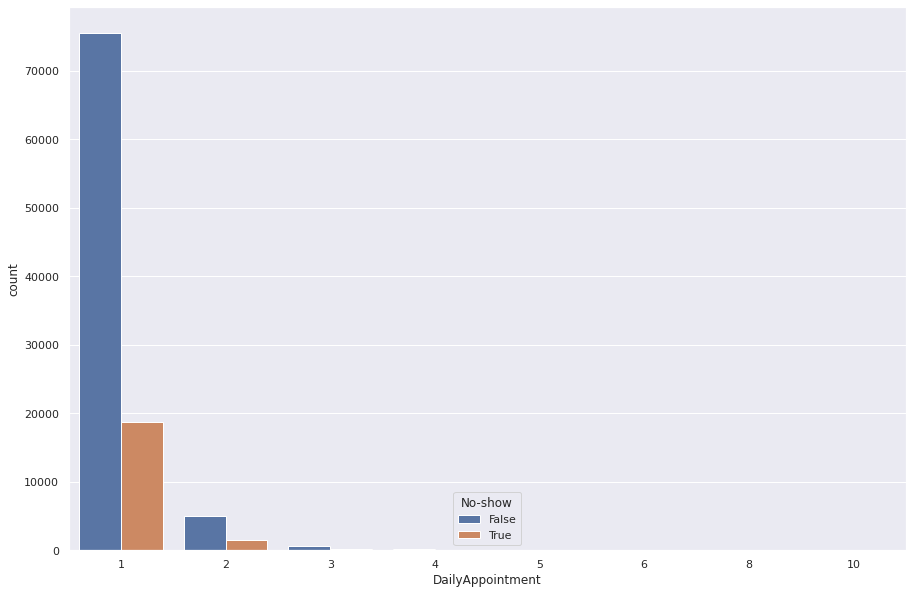

In [41]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="DailyAppointment", hue="No-show", data=merge2)
plt.show()

In [42]:
noshowyes=merge2[merge2['No-show']==True]["DailyAppointment"]
noshowno=merge2[merge2['No-show']==False]["DailyAppointment"]

#### Aynı güne birden fazla randevu alanların katılım oranı

In [43]:


plt.figure(figsize=(20, 15))
dayapprate=noshowyes.value_counts()/(noshowno.value_counts()+noshowyes.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=dayapprate.index, 
             y=dayapprate.values,title="The non-participation rate of customers who made an appointment on the same date",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

#### 13-Burs alanların randevuya katılma oranları (0=Burssuz 1=Burslu)

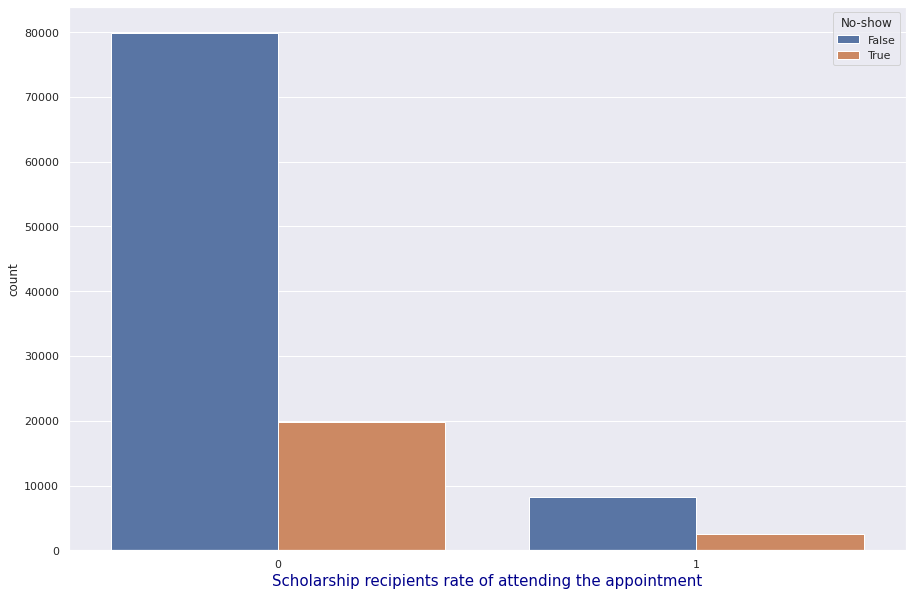

In [44]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Scholarship", hue="No-show", data=df)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)

plt.show()

Scholarship=0 rate

In [45]:
yscolarshipn=df[(df["Scholarship"]==1) & (df["No-show"]==False)]['No-show'].count()
yscolarshipy=df[(df["Scholarship"]==1) & (df["No-show"]==True)]['No-show'].count()

nscolarshipn=df[(df["Scholarship"]==0) & (df["No-show"]==False)]['No-show'].count()
nscolarshipy=df[(df["Scholarship"]==0) & (df["No-show"]==True)]['No-show'].count()


#### Burs alanların randevuya katılma oranları (True=Burslu, False=Burssuz )

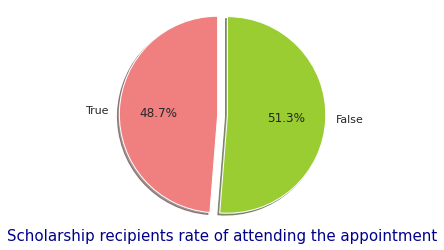

In [46]:
yscolar=yscolarshipn/(yscolarshipn+yscolarshipy)*100
nscolar=nscolarshipn/(nscolarshipn+nscolarshipy)*100

labels = 'True', 'False'
sizes = [yscolar, nscolar]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)

plt.show()

>The rate of those who do not receive a scholarship to attend the appointment

#### 14-Randevu günlerine göre katılım grafiği

In [47]:
df["Day-name"]=df.AppointmentDay.dt.day_name()

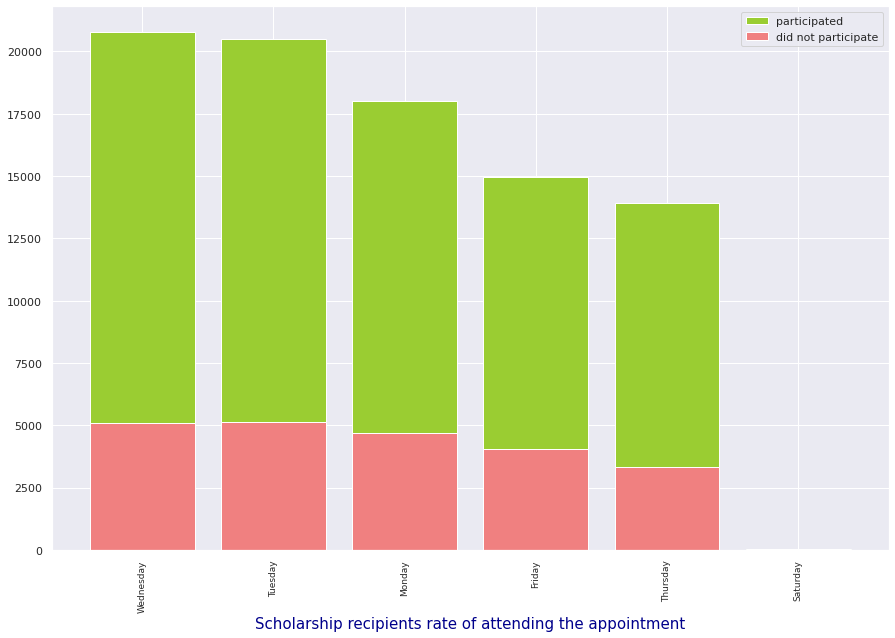

In [48]:
appdaysn=df[df["No-show"]==False]["Day-name"].value_counts()
appdaysy=df[df["No-show"]==True]["Day-name"].value_counts()
plt.figure(figsize=(15, 10))
plt.subplot(1,1,1)
plt.bar(appdaysn.index,appdaysn.values, color = "yellowgreen",label = 'participated')
plt.bar(appdaysy.index,appdaysy.values, color = "lightcoral",label = 'did not participate')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)
plt.legend()
plt.show()

In [49]:
df[df["No-show"]==False].AppointmentDay.dt.day_name().value_counts()


Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: AppointmentDay, dtype: int64

#### Randevuya katılım oranları
> Aşağıdaki grafiğe bakarak en çok cumartesi günleri alınan randevuların katılım oranının düşük olduğu görünmekte

In [50]:

plt.figure(figsize=(20, 15))
samedayrate=appdaysn/(appdaysn+appdaysy)*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=samedayrate.index, 
             y=samedayrate.values,title="Daily attendance chart",
                 labels={"index": "What day was an appointment",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

#### 15- Sms Bilgisi (0= Sms Almayanlar 1=Sms Alanlar)

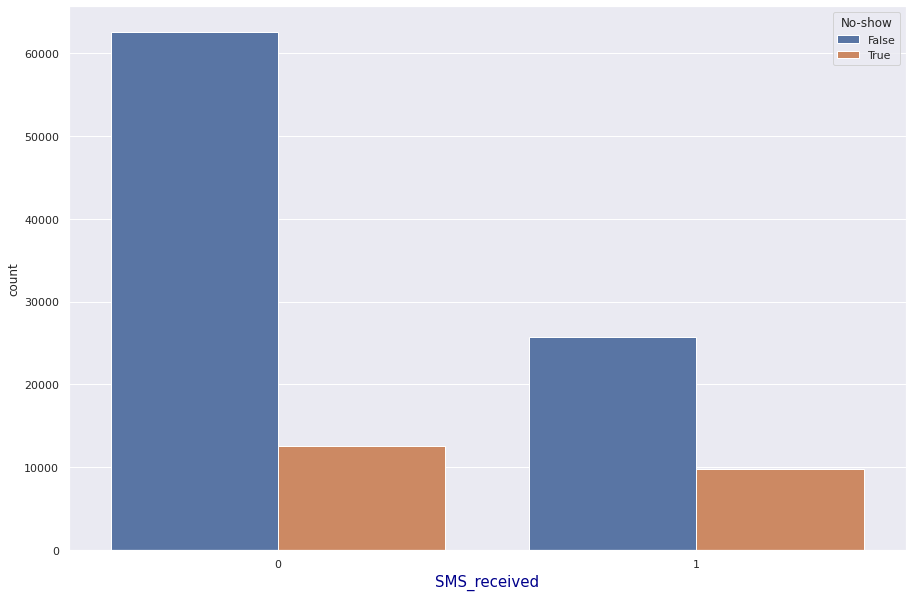

In [51]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="SMS_received", hue="No-show", data=df)
plt.xlabel('SMS_received',fontdict = axis_style)

plt.show()

##### Sms ile randevuya gelen müşterilerin oranı

In [52]:
ysmsno=df[(df["No-show"]==False) & (df['SMS_received']>0)]["No-show"].count()
ysmsyes=df[(df["No-show"]==True) & (df['SMS_received']>0)]["No-show"].count()

In [53]:
nsmsno=df[(df["No-show"]==False) & (df['SMS_received']==0)]["No-show"].count()
nsmsyes=df[(df["No-show"]==True) & (df['SMS_received']==0)]["No-show"].count()

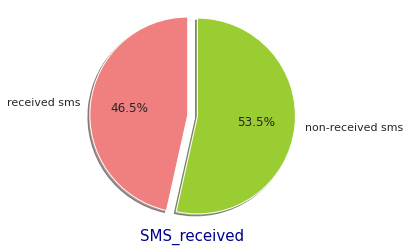

In [54]:
smsyes=ysmsno/(ysmsno+ysmsyes)*100
smsno=nsmsno/(nsmsno+nsmsyes)*100

labels = 'received sms', 'non-received sms'
sizes = [smsyes, smsno]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('SMS_received',fontdict = axis_style)

plt.show()

In [55]:
chronicpatientdf=df[(df["Hipertension"]==1) | (df["Diabetes"]==1) | (df["Alcoholism"]==1) | (df["Handcap"]==1)]
notchronic=df[(df["Hipertension"]!=1) & (df["Diabetes"]!=1) & (df["Alcoholism"]!=1) & (df["Handcap"]!=1)]

##### Kronik Hastalıklar İçin "Chronic" isminde Bir Kolon Oluşturuyorum (0=Kronik Hastalığı Yok, 1=Kronik Hasta)

In [56]:
chronicpatientdf["Chronic"]=1
notchronic["Chronic"]=0
df=pd.concat([chronicpatientdf,notchronic],axis=0)

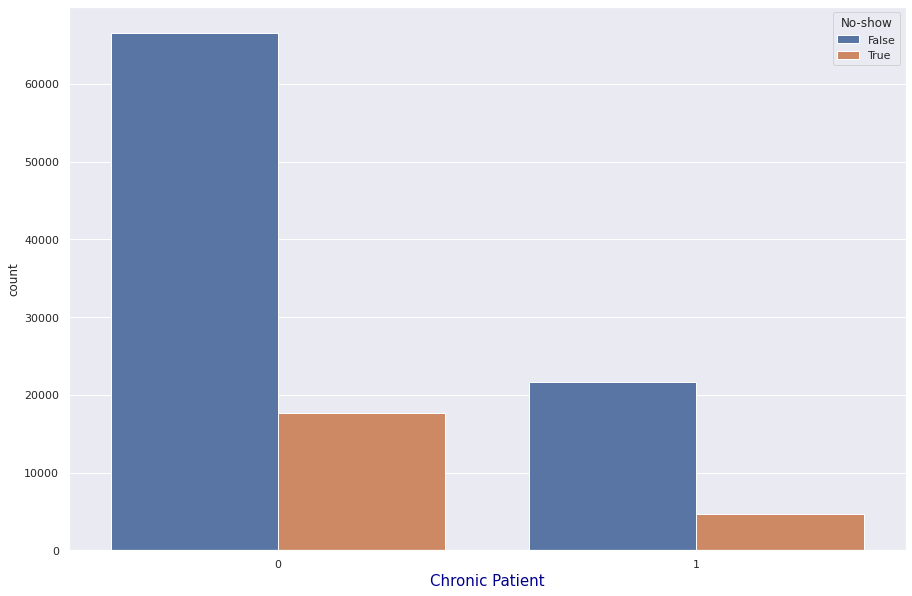

In [57]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Chronic", hue="No-show", data=df)
plt.xlabel('Chronic Patient',fontdict = axis_style)

plt.show()

> Chronic patient participation rate

#### 16-Randevuya gelen kronik hastalığı olan ve olmayanların oranı

In [58]:
chronicn=chronicpatientdf[chronicpatientdf["No-show"]==False]["No-show"].count()
chronicy=chronicpatientdf[chronicpatientdf["No-show"]==True]["No-show"].count()

In [59]:
notchronicn=notchronic[notchronic["No-show"]==False]["No-show"].count()
notchronicy=notchronic[notchronic["No-show"]==True]["No-show"].count()

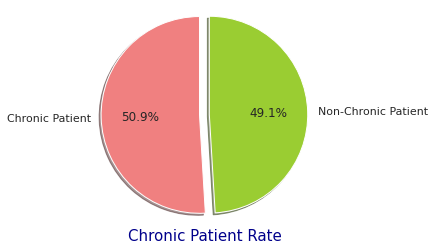

In [60]:
ychronic=chronicn/(chronicn+chronicy)*100
nchronic=notchronicn/(notchronicn+notchronicy)*100


labels = 'Chronic Patient', 'Non-Chronic Patient'
sizes = [ychronic, nchronic]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('Chronic Patient Rate',fontdict = axis_style)

plt.show()

> Non-chronic patient participation rate

#### 17- Yaşlara göre Randevular

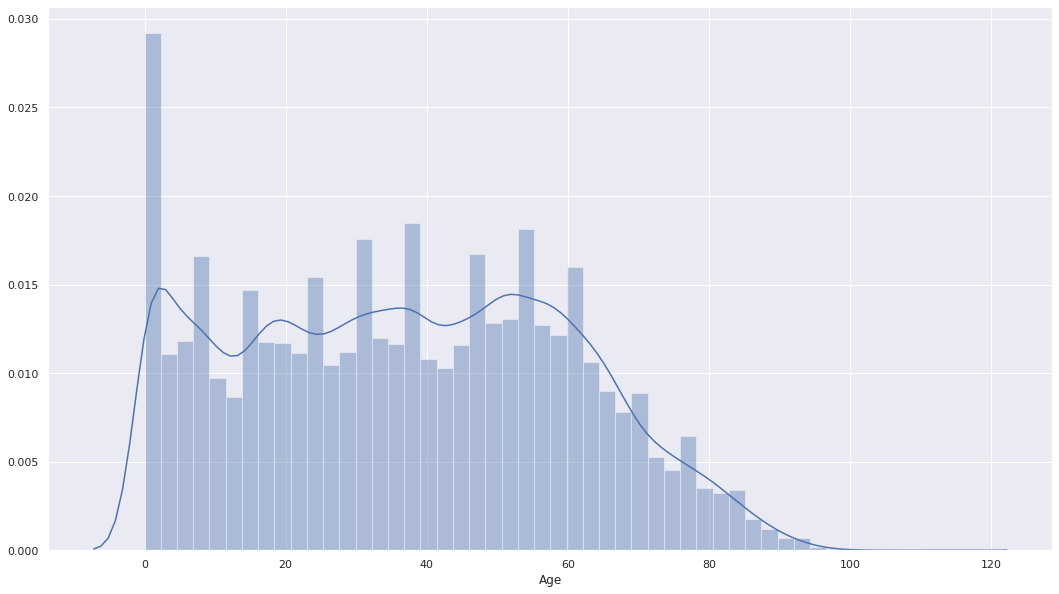

In [61]:
plt.figure(figsize=(18,10))
ax = sns.distplot(df["Age"])
plt.show()

In [62]:
agen=df[df["No-show"]==False].Age
agey=df[df["No-show"]==True].Age


#### Yaşlara göre Randevuya katılma oranları

In [63]:

plt.figure(figsize=(20, 15))
agerate=agen.value_counts()/(agey.value_counts()+agen.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=agerate.index, 
             y=agerate.values,title="-",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

In [64]:
noshowcorr = df.corr()
display(noshowcorr)

PatientId  AppointmentID    Gender       Age  Scholarship  \
PatientId       1.000000       0.004023  0.007898 -0.004121    -0.002877   
AppointmentID   0.004023       1.000000  0.018506 -0.019106     0.022619   
Gender          0.007898       0.018506  1.000000 -0.106452    -0.114296   
Age            -0.004121      -0.019106 -0.106452  1.000000    -0.092463   
Scholarship    -0.002877       0.022619 -0.114296 -0.092463     1.000000   
Hipertension   -0.006436       0.012759 -0.055722  0.504586    -0.019730   
Diabetes        0.001608       0.022632 -0.032556  0.292391    -0.024894   
Alcoholism      0.011014       0.032946  0.106166  0.095810     0.035022   
Handcap        -0.007915       0.014107  0.022813  0.078032    -0.008587   
SMS_received   -0.009742      -0.256613 -0.046302  0.012633     0.001192   
No-show        -0.001456      -0.162597 -0.004122 -0.060327     0.029134   
days           -0.001093      -0.771189 -0.027203  0.032693    -0.030075   
Chronic        -0.001070       0.028626 -0.022127  0.509269    -0.009971   

               Hipertension  Diabetes  Alcoholism   Handcap  SMS_received  \
PatientId         -0.006436  0.001608    0.011014 -0.007915     -0.009742   
AppointmentID      0.012759  0.022632    0.032946  0.014107     -0.256613   
Gender            -0.055722 -0.032556    0.106166  0.022813     -0.046302   
Age                0.504586  0.292391    0.095810  0.078032      0.012633   
Scholarship       -0.019730 -0.024894    0.035022 -0.008587      0.001192   
Hipertension       1.000000  0.433085    0.087970  0.080083     -0.006270   
Diabetes           0.433085  1.000000    0.018473  0.057530     -0.014552   
Alcoholism         0.087970  0.018473    1.000000  0.004647     -0.026149   
Handcap            0.080083  0.057530    0.004647  1.000000     -0.024162   
SMS_received      -0.006270 -0.014552   -0.026149 -0.024162      1.000000   
No-show           -0.035704 -0.015181   -0.000197 -0.006077      0.126428   
days              -0.018750 -0.028082   -0.037822 -0.019541      0.388194   
Chronic            0.887009  0.497929    0.316850  0.215800     -0.019705   

                No-show      days   Chronic  
PatientId     -0.001456 -0.001093 -0.001070  
AppointmentID -0.162597 -0.771189  0.028626  
Gender        -0.004122 -0.027203 -0.022127  
Age           -0.060327  0.032693  0.509269  
Scholarship    0.029134 -0.030075 -0.009971  
Hipertension  -0.035704 -0.018750  0.887009  
Diabetes      -0.015181 -0.028082  0.497929  
Alcoholism    -0.000197 -0.037822  0.316850  
Handcap       -0.006077 -0.019541  0.215800  
SMS_received   0.126428  0.388194 -0.019705  
No-show        1.000000  0.180072 -0.032362  
days           0.180072  1.000000 -0.034878  
Chronic       -0.032362 -0.034878  1.000000

#### 18 - Yaş ile randevu alma tarihi arasındaki ilişkiyi inceleyelim

Text(0, 0.5, 'Days')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


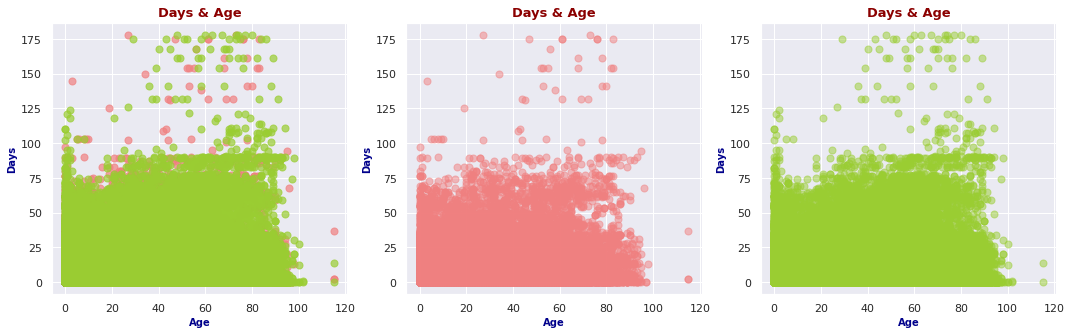

In [65]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(df[df["No-show"]==True]["Age"], df[df["No-show"]==True]["days"],color="lightcoral", s=50, alpha=0.7)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )


plt.scatter(df[df["No-show"]==False]["Age"], df[df["No-show"]==False]["days"],c="yellowgreen", s=50, alpha=0.7)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

plt.subplot(1,3,2)
plt.scatter(df[df["No-show"]==True]["Age"], df[df["No-show"]==True]["days"],color="lightcoral", s=50, alpha=0.5)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

plt.subplot(1,3,3)
plt.scatter(df[df["No-show"]==False]["Age"], df[df["No-show"]==False]["days"],c="yellowgreen", s=50, alpha=0.5)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

>The graph shows the age of the patient and how many days before the hospital made an appointment. Green dots are people attending the appointment. Red dots indicate people who did not attend the appointment. By looking at this graph, we can say that patients over the age of 40 can wait more than 100 days for an appointment.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


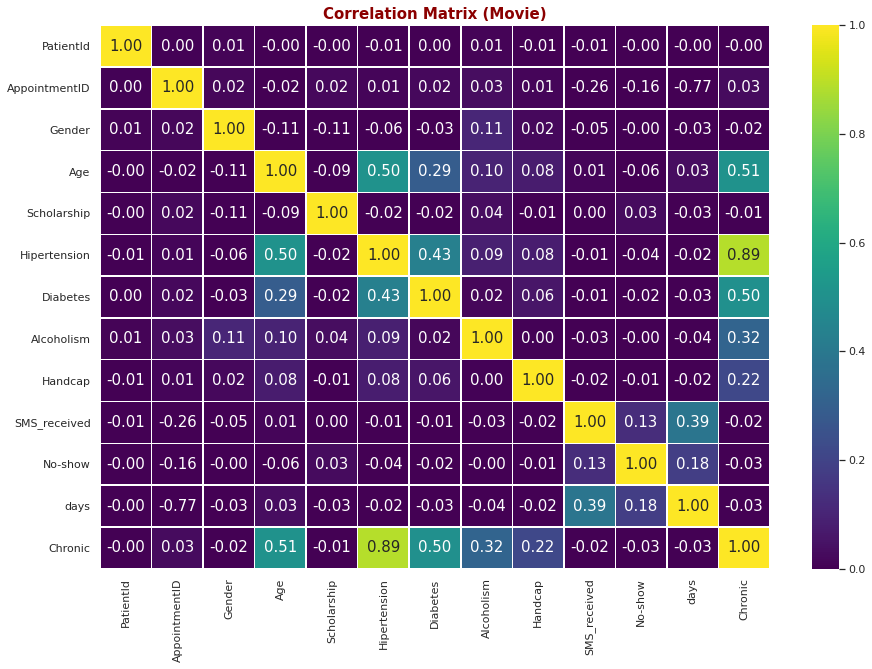

In [66]:
plt.figure(figsize=(15,10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }
sns.heatmap(noshowcorr, annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)", fontdict=title_font)

plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [68]:
import copy
olddf=copy.deepcopy(df) # orjinal halini olddf içerisinde tutuyorum

In [69]:
df["Day-name"].replace({"Monday": 1, "Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday":5 ,"Saturday": 6},inplace=True)




### Lojistik Regresyon

In [70]:
df = pd.read_csv('Data/KaggleV3',  low_memory=False)
olddf=copy.deepcopy(df) # orjinal halini olddf içerisinde tutuyorum

In [71]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver='lbfgs')

from sklearn.model_selection import train_test_split

In [72]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression(C= 1, penalty= 'l2')
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    accuracy=logreg_model.score(X_test, y_test)
    print("Accuracy : {}\n".format(accuracy))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    roc=roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])
    print("Accuracy : {}\n".format(accuracy))
    print("Roc Value : {}".format(roc))
    
    return  roc,accuracy

In [73]:
def create_plot(bar1,bar2,name1,name2):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['Roc','Accuracy']
    ax.bar(langs,bar1,label = name1)
    ax.bar(langs,bar2,label =name2)
    ax.set_ylim([0.55, 0.7])
    plt.legend()


    plt.show()

## Imbalanced Data

> Randevuya katılan ve katılmayan verisinde eşitsizlik olduğu için. Dengesizliği kaldırmak için benzer verilerlerle dolduralım

### ADASYN

In [74]:
from imblearn.over_sampling import ADASYN

y = df['No-show']
X = df.drop(['No-show','PatientId',"PatientId","Neighbourhood","AppointmentID","AppointmentDay","ScheduledDay"],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)
adas=create_model(X_adasyn, y_adasyn)



Accuracy : 0.612460372157133

Train Dataset
              precision    recall  f1-score   support

       False       0.60      0.58      0.59     70566
        True       0.62      0.64      0.63     74534

    accuracy                           0.61    145100
   macro avg       0.61      0.61      0.61    145100
weighted avg       0.61      0.61      0.61    145100

Test Dataset
              precision    recall  f1-score   support

       False       0.61      0.58      0.59     17641
        True       0.62      0.65      0.63     18634

    accuracy                           0.61     36275
   macro avg       0.61      0.61      0.61     36275
weighted avg       0.61      0.61      0.61     36275

Accuracy : 0.612460372157133

Roc Value : 0.6540139169830943


### SMOTE

In [75]:
from imblearn.over_sampling import SMOTE
y = df['No-show']
X = df.drop(['No-show','PatientId',"PatientId","Neighbourhood","AppointmentID","AppointmentDay","ScheduledDay"],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)
smote=create_model(X_smote, y_smote)

Accuracy : 0.6263072867953405

Train Dataset
              precision    recall  f1-score   support

       False       0.62      0.67      0.64     70565
        True       0.64      0.58      0.61     70566

    accuracy                           0.63    141131
   macro avg       0.63      0.63      0.63    141131
weighted avg       0.63      0.63      0.63    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.62      0.67      0.64     17642
        True       0.64      0.58      0.61     17641

    accuracy                           0.63     35283
   macro avg       0.63      0.63      0.63     35283
weighted avg       0.63      0.63      0.63     35283

Accuracy : 0.6263072867953405

Roc Value : 0.6658234104278611


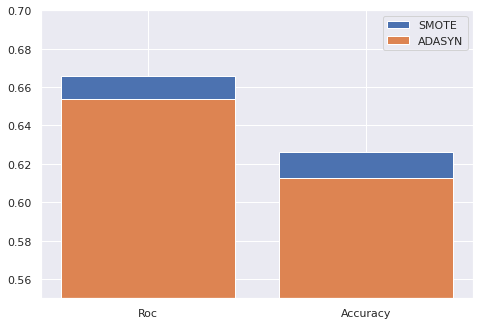

In [76]:
create_plot(smote,adas,'SMOTE','ADASYN')

> #### Smote analizi ile daha verimli sonuçlara ulaştığımız için bu veri setini kullanacağız

In [77]:
df=pd.concat([X_smote, y_smote], axis=1)

In [78]:
df

Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0            0   62            0             1         0           0        0   
1            0   56            0             1         1           0        0   
2            0   76            0             1         0           0        0   
3            1   46            0             1         0           0        0   
4            0   45            0             1         0           0        0   
...        ...  ...          ...           ...       ...         ...      ...   
176409       1   56            1             0         0           0        0   
176410       0    4            0             0         0           0        0   
176411       0   19            0             0         0           0        0   
176412       1   81            0             1         0           0        0   
176413       0    0            0             0         0           0        0   

        SMS_received  days  Day-name  Chronic  No-show  
0                  0     0         5        1    False  
1                  0     0         5        1    False  
2                  0     1         5        1    False  
3                  1     2         5        1    False  
4                  0     0         5        1    False  
...              ...   ...       ...      ...      ...  
176409             0     0         2        0     True  
176410             0    53         1        0     True  
176411             1    25         1        0     True  
176412             0     5         3        1     True  
176413             1    55         3        0     True  

[176414 rows x 12 columns]

In [79]:
y = df['No-show']
X = df.drop(['No-show'],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

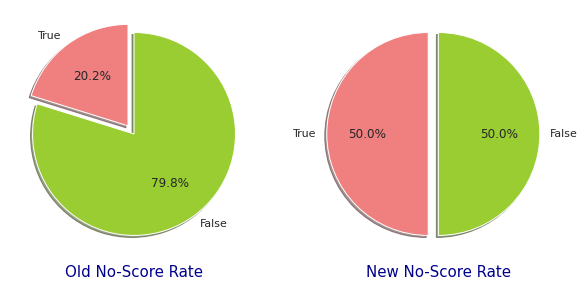

In [80]:
onstrue=olddf[olddf["No-show"]==True]["No-show"].count()
onstruepercent=nstrue/olddf["No-show"].count()*100
onsfalsepercent=100-nstruepercent

nstrue=df[df["No-show"]==True]["No-show"].count()
nstruepercent=nstrue/df["No-show"].count()*100
nsfalsepercent=100-nstruepercent


labels = 'True', 'False'
sizes = [onstruepercent, onsfalsepercent]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax1[0].pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].set_xlabel('Old No-Score Rate',fontdict = axis_style)


sizes = [nstruepercent, nsfalsepercent]

ax1[1].pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90) 
ax1[1].set_xlabel('New No-Score Rate',fontdict = axis_style)


plt.show()

> #### Smote analizi ile verilerimizi doldurduk. 

### Polynomial Features

In [81]:
from sklearn.preprocessing import PolynomialFeatures

pm=PolynomialFeatures()
pm.fit(X)


PolynomialFeatures()

In [82]:
pm.fit_transform

<bound method TransformerMixin.fit_transform of PolynomialFeatures()>

In [83]:
x_pol=pm.transform(X)

> #### Yeni featurelar oluşturarak tahmin sonucumuzu arttırmayı hedefliyoruz

In [84]:
x_pol_df=pd.DataFrame(x_pol,columns=pm.get_feature_names(X.columns))


In [85]:
#pm.get_feature_names(X.columns)

In [86]:
pm.get_feature_names(X.columns)

['1',
 'Gender',
 'Age',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'days',
 'Day-name',
 'Chronic',
 'Gender^2',
 'Gender Age',
 'Gender Scholarship',
 'Gender Hipertension',
 'Gender Diabetes',
 'Gender Alcoholism',
 'Gender Handcap',
 'Gender SMS_received',
 'Gender days',
 'Gender Day-name',
 'Gender Chronic',
 'Age^2',
 'Age Scholarship',
 'Age Hipertension',
 'Age Diabetes',
 'Age Alcoholism',
 'Age Handcap',
 'Age SMS_received',
 'Age days',
 'Age Day-name',
 'Age Chronic',
 'Scholarship^2',
 'Scholarship Hipertension',
 'Scholarship Diabetes',
 'Scholarship Alcoholism',
 'Scholarship Handcap',
 'Scholarship SMS_received',
 'Scholarship days',
 'Scholarship Day-name',
 'Scholarship Chronic',
 'Hipertension^2',
 'Hipertension Diabetes',
 'Hipertension Alcoholism',
 'Hipertension Handcap',
 'Hipertension SMS_received',
 'Hipertension days',
 'Hipertension Day-name',
 'Hipertension Chronic',
 'Diabetes^2',
 'Diabetes Alcoholism',
 'Di

### Lojistik Regresyon (Polynomial Feature)

In [87]:

##X = df["Age","Hipertension","SMS_received","days","Gender SMS_received","Age Hipertension","Age days","Age Chronic","Scholarship Handcap","Scholarship days","Hipertension days","Hipertension Chronic",""]

y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


polynomial=create_model(X,y)

#log_reg.fit(X_train, y_train)

#train_accuracy = log_reg.score(X_train, y_train)
#test_accuracy = log_reg.score(X_test, y_test)

#print('One-vs.-Rest', '-'*30, 
#      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
#      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy : 0.6553581044695745

Train Dataset
              precision    recall  f1-score   support

       False       0.65      0.67      0.66     70565
        True       0.66      0.64      0.65     70566

    accuracy                           0.66    141131
   macro avg       0.66      0.66      0.66    141131
weighted avg       0.66      0.66      0.66    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.65      0.67      0.66     17642
        True       0.66      0.64      0.65     17641

    accuracy                           0.66     35283
   macro avg       0.66      0.66      0.66     35283
weighted avg       0.66      0.66      0.66     35283

Accuracy : 0.6553581044695745

Roc Value : 0.690671470749151


### Lojistik Regresyon (Polinomial Feature Olmadan)

In [88]:
y = df['No-show']
X = df.drop(['No-show'],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

nonpolynomial=create_model(X,y)

Accuracy : 0.6263072867953405

Train Dataset
              precision    recall  f1-score   support

       False       0.62      0.67      0.64     70565
        True       0.64      0.58      0.61     70566

    accuracy                           0.63    141131
   macro avg       0.63      0.63      0.63    141131
weighted avg       0.63      0.63      0.63    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.62      0.67      0.64     17642
        True       0.64      0.58      0.61     17641

    accuracy                           0.63     35283
   macro avg       0.63      0.63      0.63     35283
weighted avg       0.63      0.63      0.63     35283

Accuracy : 0.6263072867953405

Roc Value : 0.6658234104278611


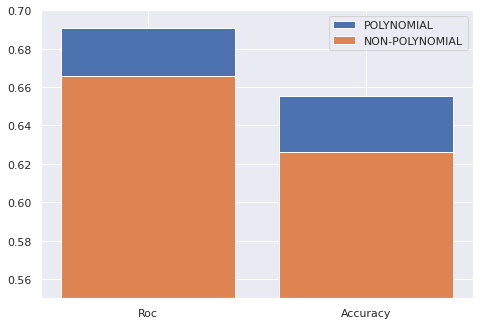

In [89]:
create_plot(polynomial,nonpolynomial,'POLYNOMIAL','NON-POLYNOMIAL')

> Polynomial Features ile Oluşturduğumuz yeni Feature'lar sayesinde (Model1) tahmin değerlerimiz bir miktar daha arttı. Buyüzden bu featuresları kullanacağız

In [90]:
y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


### Hyperparameter tuning

In [91]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [92]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

### GridSearch

In [93]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 5,verbose=1,
                       refit = True,
                       
                      )

grid_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [94]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)
 

Best Parameters :  {'C': 0.01, 'penalty': 'l2'}
Best Score      :  0.5912287124993434


In [95]:
print("Best Score      : ", grid_cv.score(X,y))

Best Score      :  0.6599646286575895


In [96]:
logreg_model = LogisticRegression(C= 1, penalty= 'l2')
logreg_model.fit(X_train, y_train)
print("Best Score      : ", logreg_model.score(X,y))

Best Score      :  0.6560987223236251


In [97]:
y = list(y)


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=25, random_state=111)
random_forest.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=111)

> #### Feature'ların önem derecelerini görüntüleyelim

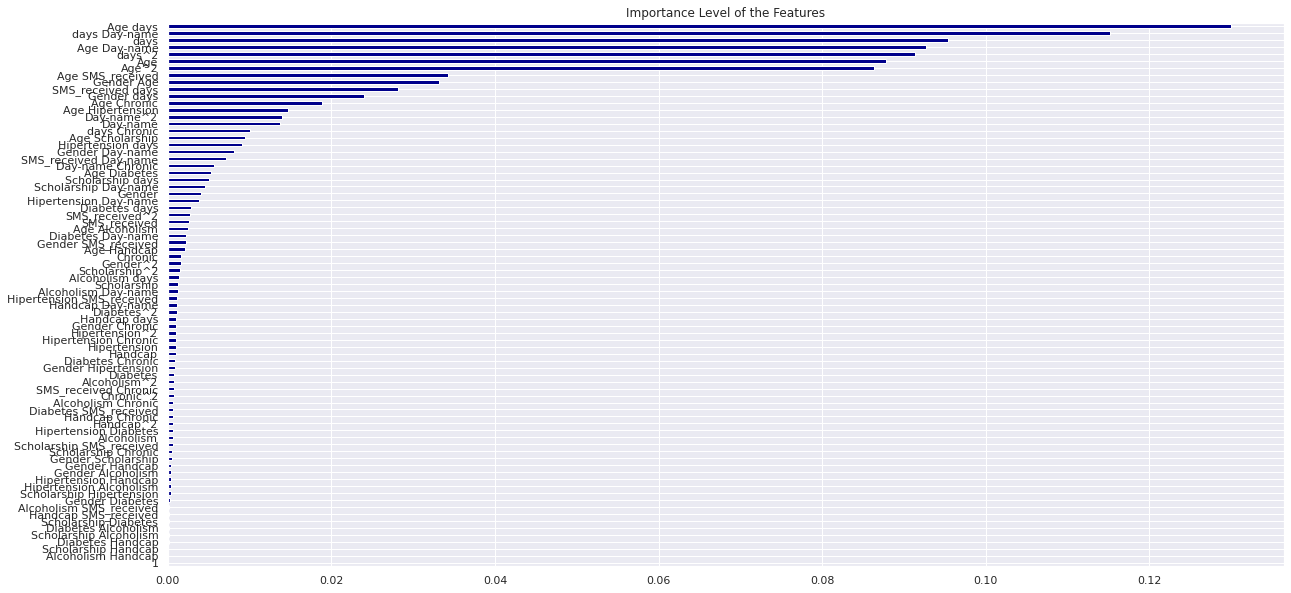

In [99]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [100]:
importance_level_sorted

1                         0.000000
Alcoholism Handcap        0.000045
Scholarship Handcap       0.000051
Diabetes Handcap          0.000098
Scholarship Alcoholism    0.000100
                            ...   
days^2                    0.091357
Age Day-name              0.092685
days                      0.095330
days Day-name             0.115126
Age days                  0.129941
Length: 78, dtype: float64

In [101]:
importance_level_sorted=importance_level_sorted.drop('1')

In [102]:
importance_level_sorted=np.array(importance_level_sorted.index)

In [103]:
importance_level_sorted


array(['Alcoholism Handcap', 'Scholarship Handcap', 'Diabetes Handcap',
       'Scholarship Alcoholism', 'Diabetes Alcoholism',
       'Scholarship Diabetes', 'Handcap SMS_received',
       'Alcoholism SMS_received', 'Gender Diabetes',
       'Scholarship Hipertension', 'Hipertension Alcoholism',
       'Hipertension Handcap', 'Gender Alcoholism', 'Gender Handcap',
       'Gender Scholarship', 'Scholarship Chronic',
       'Scholarship SMS_received', 'Alcoholism', 'Hipertension Diabetes',
       'Handcap^2', 'Handcap Chronic', 'Diabetes SMS_received',
       'Alcoholism Chronic', 'Chronic^2', 'SMS_received Chronic',
       'Alcoholism^2', 'Diabetes', 'Gender Hipertension',
       'Diabetes Chronic', 'Handcap', 'Hipertension',
       'Hipertension Chronic', 'Hipertension^2', 'Gender Chronic',
       'Handcap days', 'Diabetes^2', 'Handcap Day-name',
       'Hipertension SMS_received', 'Alcoholism Day-name', 'Scholarship',
       'Alcoholism days', 'Scholarship^2', 'Gender^2', 'Chronic',


> #### Bu kısımda yüksek oranlı featureları seçerek devam edilebilir. Tümünü kullanmayı tercih ediyorum

In [104]:
x_pol_df[['Alcoholism Handcap', 'Scholarship Handcap', 'Diabetes Alcoholism',
       'Scholarship Alcoholism', 'Diabetes Handcap',
       'Scholarship Diabetes', 'Handcap SMS_received',
       'Diabetes SMS_received', 'Gender Diabetes',
       'Alcoholism SMS_received', 'Hipertension Handcap',
       'Gender Alcoholism', 'Gender Handcap', 'Hipertension Alcoholism',
       'Scholarship Hipertension', 'Scholarship Chronic', 'Alcoholism^2',
       'Gender Scholarship', 'Scholarship SMS_received',
       'Hipertension SMS_received', 'Hipertension Diabetes',
       'Alcoholism Chronic', 'Hipertension Chronic', 'Diabetes',
       'SMS_received Chronic', 'Handcap^2', 'Gender Hipertension',
       'Handcap Chronic', 'Handcap', 'Alcoholism', 'Gender Chronic',
       'Diabetes Chronic', 'Handcap days', 'Chronic^2',
       'Alcoholism Day-name', 'Handcap Day-name', 'Diabetes^2',
       'Alcoholism days', 'Scholarship', 'Hipertension', 'Hipertension^2',
       'Scholarship^2', 'Age Handcap', 'Diabetes Day-name', 'Chronic',
       'Gender SMS_received', 'SMS_received', 'Age Alcoholism', 'Gender',
       'Diabetes days', 'Scholarship Day-name', 'SMS_received^2',
       'Hipertension Day-name', 'Day-name Chronic', 'Gender^2',
       'Scholarship days', 'Age Diabetes', 'SMS_received Day-name',
       'Hipertension days', 'Gender Day-name', 'days Chronic',
       'Age Scholarship', 'Day-name^2', 'Day-name', 'Age Hipertension',
       'Gender days', 'Age Chronic', 'SMS_received days', 'Gender Age',
       'Age SMS_received', 'days^2', 'Age', 'Age^2', 'Age Day-name',
       'days', 'Age days', 'days Day-name']]

Alcoholism Handcap  Scholarship Handcap  Diabetes Alcoholism  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
176409                 0.0                  0.0                  0.0   
176410                 0.0                  0.0                  0.0   
176411                 0.0                  0.0                  0.0   
176412                 0.0                  0.0                  0.0   
176413                 0.0                  0.0                  0.0   

        Scholarship Alcoholism  Diabetes Handcap  Scholarship Diabetes  \
0                          0.0               0.0                   0.0   
1                          0.0               0.0                   0.0   
2                          0.0               0.0                   0.0   
3                          0.0               0.0                   0.0   
4                          0.0               0.0                   0.0   
...                        ...               ...                   ...   
176409                     0.0               0.0                   0.0   
176410                     0.0               0.0                   0.0   
176411                     0.0               0.0                   0.0   
176412                     0.0               0.0                   0.0   
176413                     0.0               0.0                   0.0   

        Handcap SMS_received  Diabetes SMS_received  Gender Diabetes  \
0                        0.0                    0.0              0.0   
1                        0.0                    0.0              0.0   
2                        0.0                    0.0              0.0   
3                        0.0                    0.0              0.0   
4                        0.0                    0.0              0.0   
...                      ...                    ...              ...   
176409                   0.0                    0.0              0.0   
176410                   0.0                    0.0              0.0   
176411                   0.0                    0.0              0.0   
176412                   0.0                    0.0              0.0   
176413                   0.0                    0.0              0.0   

        Alcoholism SMS_received  ...  SMS_received days  Gender Age  \
0                           0.0  ...                0.0         0.0   
1                           0.0  ...                0.0         0.0   
2                           0.0  ...                0.0         0.0   
3                           0.0  ...                2.0        46.0   
4                           0.0  ...                0.0         0.0   
...                         ...  ...                ...         ...   
176409                      0.0  ...                0.0        56.0   
176410                      0.0  ...                0.0         0.0   
176411                      0.0  ...               25.0         0.0   
176412                      0.0  ...                0.0        81.0   
176413                      0.0  ...               55.0         0.0   

        Age SMS_received  days^2   Age   Age^2  Age Day-name  days  Age days  \
0                    0.0     0.0  62.0  3844.0         310.0   0.0       0.0   
1                    0.0     0.0  56.0  3136.0         280.0   0.0       0.0   
2                    0.0     1.0  76.0  5776.0         380.0   1.0      76.0   
3                   46.0     4.0  46.0  2116.0         230.0   2.0      92.0   
4                    0.0     0.0  45.0  2025.0         225.0   0.0       0.0   
...                  ...     ...   ...     ...          

In [105]:
y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


### Cross Validation

In [106]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

log_reg_model = LogisticRegression(C= 1, penalty= 'l2')

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    scoring = ['accuracy','precision',"recall"]
                   )



In [107]:

print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))
print('Test Set Mean Recall : {:.2f}'.format(cv['test_recall'].mean()))
print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))


roc=roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])
print("Roc Value : {}".format(roc))
cross=[roc,cv['test_accuracy'].mean()]


Test Set Mean Precision  : 0.61  
Test Set Mean Recall : 0.65
Test Set Mean Accuracy   : 0.61  
Roc Value : 0.690671470749151


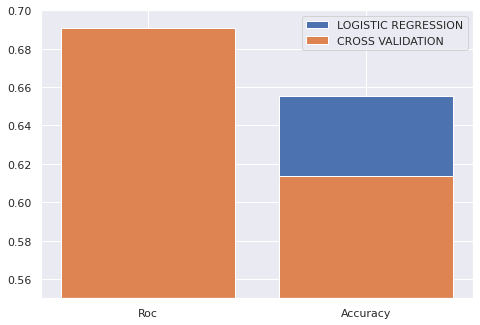

In [108]:
create_plot(polynomial,cross,'LOGISTIC REGRESSION',"CROSS VALIDATION")

> #### Cross validation kullandığımız zaman accuracy değerimizin, Bir önceki tahminimizden daha düşük olduğunu farkettik. Bunun sebebi cross validation yapılmadığı zaman train ve test değerleri düzgün dağılmayabilir.(Bizim örneğimizde olduğu gibi) 

### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [110]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Average cross validation score  : ', np.mean(cvscores_10))

cv = 10 ---> Average cross validation score  :  0.6636623644451641


In [111]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

compare_decision_tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,random_state = 111)
compare_decision_tree.fit(X_train, y_train)

compare_log_reg = LogisticRegression()
compare_log_reg.fit(X_train, y_train)

LogisticRegression()

### Logistic Regression, Decision Tree vs Random Forest

In [112]:
y_predict_dt = compare_decision_tree.predict(X_test)
y_predict_lr = compare_log_reg.predict(X_test)

print("Decision Tree Accuracy        : {:.4f}".format(accuracy_score(y_test, y_predict_dt)))
dtroc=roc_auc_score(y_test, y_predict_dt)
print("Decision Tree Roc Value : {}\n".format(dtroc))

print("Logistic Regression Accuracy : {:.4f}".format(accuracy_score(y_test, y_predict_lr)))
lrroc=roc_auc_score(y_test, y_predict_lr)
print("Logistic Regression Roc Value : {}\n".format(dtroc))

dtree=[dtroc,accuracy_score(y_test, y_predict_dt)]
lr=[lrroc,accuracy_score(y_test, y_predict_lr)]

y_predict = random_forest.predict(X_test)
print("Accuracy of the Random Forest : {:.4f}".format(accuracy_score(y_test, y_predict)))

randomroc=roc_auc_score(y_test, y_predict)
print("Logistic Regression Roc Value : {}".format(randomroc))
randomf=[randomroc,accuracy_score(y_test, y_predict)]

Decision Tree Accuracy        : 0.6708
Decision Tree Roc Value : 0.6707812264306501

Logistic Regression Accuracy : 0.6554
Logistic Regression Roc Value : 0.6707812264306501

Accuracy of the Random Forest : 0.7523
Logistic Regression Roc Value : 0.7522606943593884


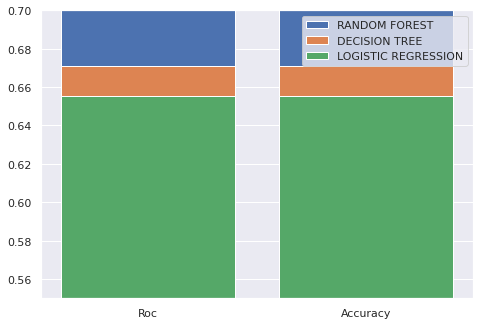

In [113]:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['Roc','Accuracy']
   
    ax.bar(langs,randomf,label ="RANDOM FOREST")
    ax.bar(langs,dtree,label = "DECISION TREE")
    ax.bar(langs,lr,label ="LOGISTIC REGRESSION")
 
    ax.set_ylim([0.55, 0.7])
    plt.legend()


    plt.show()

> #### Random forest ile en yüksek tahmin değerine ulaştık. 

In [114]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [115]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [116]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [117]:
#!pip install ipywidgets 


In [118]:
#from sklearn.metrics import accuracy_score
#y_pred= svc.predict(X_test)
#print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

In [119]:
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [14]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [121]:
import xgboost as xgb
from xgboost import XGBClassifier




#### XGBoost için Parametrelerimizi analiz edelim

In [123]:
param_test1e = {
 'learning_rate':np.arange(0,0.4,0.1),
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                             predictor = 'gpu_predictor',
                             tree_method = 'gpu_hist')
gsearch = GridSearchCV(estimator = xgb_model, 
                       param_grid = param_test1e,
                       scoring='roc_auc', 
                       n_jobs=-2, 
                       cv=5,
                       return_train_score = True,
                       verbose=1
                      )
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:   50.9s finished


learning_rate  mean_test_score  mean_train_score
3            0.3         0.687910          0.802380
2            0.2         0.681434          0.790957
1            0.1         0.672200          0.776652
0            0.0         0.500000          0.500000

In [125]:
param_test1 = {
 'max_depth':range(1,11,1),
 'min_child_weight':range(1,2)
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test1, 
                        scoring='roc_auc', 
                        n_jobs=-2, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:  2.8min finished


max_depth  min_child_weight  mean_test_score  mean_train_score
9         10                 1         0.729511          0.868597
8          9                 1         0.718490          0.852817
7          8                 1         0.708110          0.837507
6          7                 1         0.698794          0.820456
5          6                 1         0.687910          0.802380
4          5                 1         0.677526          0.787432
3          4                 1         0.669977          0.773748
2          3                 1         0.664450          0.763792
1          2                 1         0.660963          0.755482
0          1                 1         0.656866          0.746640

In [126]:
param_test3 = {
'gamma':[i for i in np.arange(0,0.6,0.05)]
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 10,
                              min_child_weight = 1,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test3, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.6min finished


gamma  mean_test_score  mean_train_score
0    0.00         0.729511          0.868597
4    0.20         0.728462          0.868868
2    0.10         0.728329          0.868209
1    0.05         0.728287          0.868205
3    0.15         0.727888          0.866154
5    0.25         0.726923          0.866494
6    0.30         0.723738          0.860106
7    0.35         0.719608          0.854193
8    0.40         0.715728          0.849918
9    0.45         0.715429          0.846635
10   0.50         0.713236          0.843529
11   0.55         0.711603          0.841174

In [127]:
param_test4 = {
'subsample':[i for i in np.arange(0.6,1, 0.1)],
 'colsample_bytree':[i for i in np.arange(0.6,1, 0.1)]
}


xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              gamma = 0,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test4, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


colsample_bytree  subsample  mean_test_score  mean_train_score
10               0.8        0.8         0.660864          0.755404
13               0.9        0.7         0.660626          0.755303
14               0.9        0.8         0.660580          0.755475
6                0.7        0.8         0.660557          0.755388
11               0.8        0.9         0.660546          0.755358
7                0.7        0.9         0.660506          0.755195
2                0.6        0.8         0.660447          0.755078
3                0.6        0.9         0.660352          0.755000
9                0.8        0.7         0.660266          0.755258
15               0.9        0.9         0.660262          0.755355
1                0.6        0.7         0.659830          0.754930
12               0.9        0.6         0.659772          0.755196
4                0.7        0.6         0.659730          0.755008
0                0.6        0.6         0.659421          0.755035
5                0.7        0.7         0.658867          0.755159
8                0.8        0.6         0.658821          0.755457

In [130]:
param_test6 = {
 'reg_alpha':[i for i in np.arange(0,2, 0.10)]
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              gamma = 0,
                              colsample_bytree = 0.8,
                              subsample = 0.8,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test6, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


reg_alpha  mean_test_score  mean_train_score
7         0.7         0.662006          0.755263
8         0.8         0.661773          0.755265
16        1.6         0.661532          0.755169
18        1.8         0.661523          0.755200
11        1.1         0.661449          0.755242
17        1.7         0.661423          0.755138
9         0.9         0.661331          0.755239
10        1.0         0.661110          0.755246
15        1.5         0.661060          0.755189
13        1.3         0.660927          0.755230
14        1.4         0.660869          0.755196
0         0.0         0.660864          0.755404
2         0.2         0.660838          0.755412
12        1.2         0.660739          0.755124
1         0.1         0.660712          0.755407
6         0.6         0.660529          0.755303
5         0.5         0.660417          0.755430
4         0.4         0.660301          0.755450
3         0.3         0.660280          0.755508
19        1.9         0.660024          0.755241

#### Bulduğumuz parametrelerde modelimizi analiz edelim

In [131]:
xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              colsample_bytree = 0.8,
                              subsample = 0.8,
                              reg_alpha = 0,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )

In [132]:
from sklearn.model_selection import cross_validate

In [133]:
cv_ = cross_validate(xgb_model, X, y, cv=5, scoring = "roc_auc", return_train_score=True)
print(cv_['test_score'].mean())
print(cv_['train_score'].mean())

0.6608644589094219
0.7554044105966085


In [134]:
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [139]:


    pred_train = xgb_model.predict(X_train)
    pred_test = xgb_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    roc=roc_auc_score(y_test, pred_test)
    print("Roc Value : {}".format(roc))
    print("Accuracy : {}\n".format(xgb_model.score(X_test, y_test)))

    xgbo=[roc,xgb_model.score(X_test, y_test)]

Train Dataset
              precision    recall  f1-score   support

       False       0.73      0.60      0.66     70565
        True       0.66      0.78      0.72     70566

    accuracy                           0.69    141131
   macro avg       0.70      0.69      0.69    141131
weighted avg       0.70      0.69      0.69    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.73      0.60      0.66     17642
        True       0.66      0.78      0.72     17641

    accuracy                           0.69     35283
   macro avg       0.70      0.69      0.69     35283
weighted avg       0.70      0.69      0.69     35283

Roc Value : 0.6901933867755239
Accuracy : 0.6901907434175099



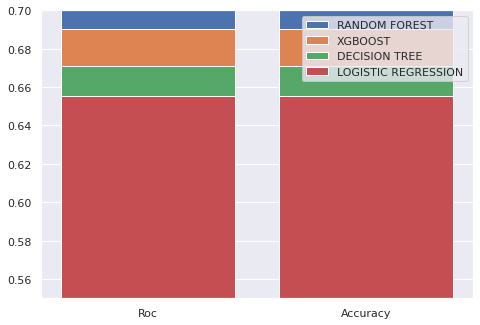

In [143]:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['Roc','Accuracy']
    
    ax.bar(langs,randomf,label ="RANDOM FOREST")
    ax.bar(langs,xgbo,label ="XGBOOST")
    ax.bar(langs,dtree,label = "DECISION TREE")
    ax.bar(langs,lr,label ="LOGISTIC REGRESSION")
   

    ax.set_ylim([0.55, 0.7])
    plt.legend()


    plt.show()

In [144]:
test_prediction_proba = xgb_model.predict_proba(X_test)[:,1]


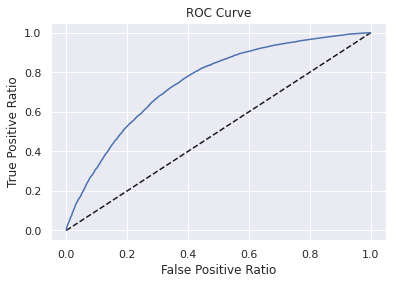

AUC value :  0.7489064335774516


In [145]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))


In [146]:
y_pred = xgb_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

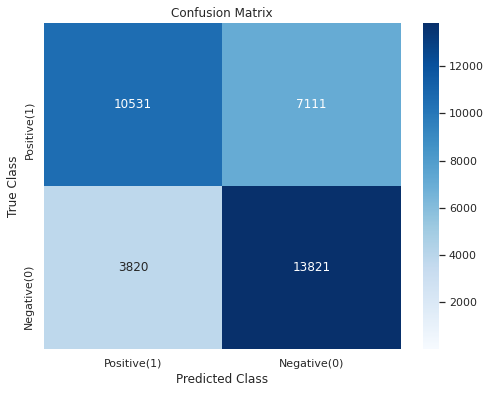

In [147]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test,y_pred )
labels = ['Positive(1)', 'Negative(0)']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### LightGBM

In [154]:

import lightgbm as lgb
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc


In [155]:
train_data=lgb.Dataset(X_train, label=y_train)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }



In [156]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [111], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }


In [157]:
# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])



In [158]:
# View the default model params:
mdl.get_params().keys()



dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight'])

In [159]:
# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, n_jobs=-1)



In [160]:
# Run the grid
grid.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 21.1min finished


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_bin=512, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary',
                                      scale_pos_weight=1, subsample=1,
                                      subsample_for_bin=200, subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.64, 0.65],
                         'learning_rate': [0.07], 'n_estimators': [8, 16],
                         'num_leaves': [20, 24, 27], 'objective': ['binary'],
                         'random_state': [111], 'subsample': [0.7, 0.75]},
             verbose=2)

In [161]:

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)



{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.07, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 111, 'subsample': 0.75}
0.6862206128278222


In [162]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)



Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 27, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


In [163]:
#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output



[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 70566, number of negative: 70565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 141131, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000014
[LightGBM] [Info] Start training from score 0.000014


Overall accuracy of Light GBM model: 0.7024629424935521


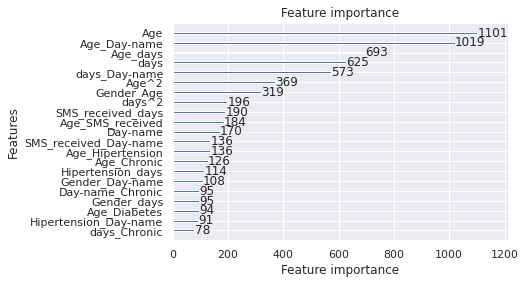

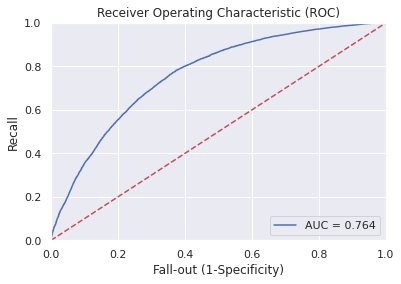

AUC score: 0.763837301916087


In [164]:
#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)



<Figure size 432x288 with 0 Axes>

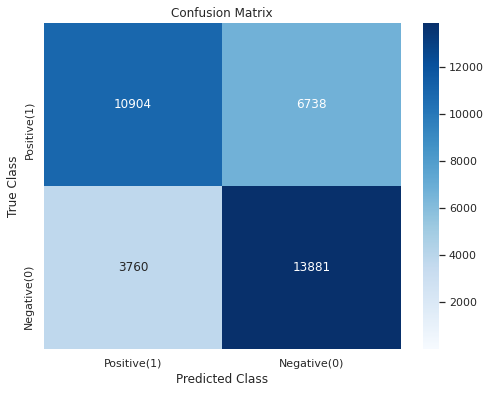

In [165]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['Positive(1)', 'Negative(0)']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [166]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'] )



In [167]:
mdl.fit(X_train, y_train)

LGBMClassifier(max_bin=512, min_child_samples=5, min_child_weight=1,
               min_split_gain=0.5, n_jobs=5, objective='binary',
               scale_pos_weight=1, subsample=0.75, subsample_for_bin=200,
               subsample_freq=1)

In [168]:
    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(mdl.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))

Accuracy : 0.6989201598503528

Train Dataset
              precision    recall  f1-score   support

       False       0.75      0.62      0.68     70565
        True       0.67      0.80      0.73     70566

    accuracy                           0.71    141131
   macro avg       0.71      0.71      0.70    141131
weighted avg       0.71      0.71      0.70    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.74      0.61      0.67     17642
        True       0.67      0.79      0.72     17641

    accuracy                           0.70     35283
   macro avg       0.71      0.70      0.70     35283
weighted avg       0.71      0.70      0.70     35283



In [169]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [170]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [171]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [172]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=111, silent=True, metric='None', n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=111,
    verbose=True)

In [173]:
gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.753098
[200]	valid's auc: 0.757708
[300]	valid's auc: 0.760733
[400]	valid's auc: 0.762931
[500]	valid's auc: 0.764381
[600]	valid's auc: 0.765698
[700]	valid's auc: 0.766755
[800]	valid's auc: 0.767673
[900]	valid's auc: 0.76873
[1000]	valid's auc: 0.769528
[1100]	valid's auc: 0.770386
[1200]	valid's auc: 0.771056
[1300]	valid's auc: 0.77169
[1400]	valid's auc: 0.772195
[1500]	valid's auc: 0.772672
[1600]	valid's auc: 0.773278
[1700]	valid's auc: 0.773857
[1800]	valid's auc: 0.774485
[1900]	valid's auc: 0.77495
[2000]	valid's auc: 0.77547
[2100]	valid's auc: 0.775976
[2200]	valid's auc: 0.776521
[2300]	valid's auc: 0.776969
[2400]	valid's auc: 0.777283
[2500]	valid's auc: 0.777682
[2600]	valid's auc: 0.778045
[2700]	valid's auc: 0.778377
[2800]	valid's auc: 0.778717
[2900]	valid's auc: 0.779043
[3000]	valid's auc: 0.779376
[3100]	valid's auc: 0.779664
[3200]	valid's auc: 0.780115
[3300]	valid's auc: 0.78

KeyboardInterrupt: 

In [634]:
opt_parameters = {'colsample_bytree': 0.7916380440478592, 'min_child_samples': 211, 'min_child_weight': 1, 'num_leaves': 45, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.5211522776637936}

In [635]:
params['colsample_bytree'] = 0.7916380440478592
params['min_child_samples'] = 211
params['min_child_weight'] = 1
params['num_leaves'] = 45
params['reg_alpha'] = 2
params['reg_lambda'] = 20
params['subsample'] = 0.5211522776637936

In [636]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.7916380440478592, metric='None',
               min_child_samples=211, min_child_weight=1, n_estimators=5000,
               num_leaves=45, random_state=111, reg_alpha=2, reg_lambda=20,
               subsample=0.5211522776637936)

In [637]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [638]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.760446
[200]	valid's auc: 0.76739
[300]	valid's auc: 0.771926
[400]	valid's auc: 0.774642
[500]	valid's auc: 0.777692
[600]	valid's auc: 0.779935
[700]	valid's auc: 0.781503
[800]	valid's auc: 0.783092
[900]	valid's auc: 0.784452
[1000]	valid's auc: 0.785689
[1100]	valid's auc: 0.78681
[1200]	valid's auc: 0.787769
[1300]	valid's auc: 0.788508
[1400]	valid's auc: 0.789319
[1500]	valid's auc: 0.790113
[1600]	valid's auc: 0.790997
[1700]	valid's auc: 0.791639
[1800]	valid's auc: 0.792282
[1900]	valid's auc: 0.79299
[2000]	valid's auc: 0.793526
[2100]	valid's auc: 0.794056
[2200]	valid's auc: 0.794492
[2300]	valid's auc: 0.795024
[2400]	valid's auc: 0.795321
[2500]	valid's auc: 0.795857
[2600]	valid's auc: 0.796345
[2700]	valid's auc: 0.796609
[2800]	valid's auc: 0.796839
[2900]	valid's auc: 0.797175
[3000]	valid's auc: 0.7975
[3100]	valid's auc: 0.797853
[3200]	valid's auc: 0.798099
[3300]	valid's auc: 0.798

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.8min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.761594
[200]	valid's auc: 0.769068
[300]	valid's auc: 0.774379
[400]	valid's auc: 0.778128
[500]	valid's auc: 0.781085
[600]	valid's auc: 0.783373
[700]	valid's auc: 0.785709
[800]	valid's auc: 0.787452
[900]	valid's auc: 0.788847
[1000]	valid's auc: 0.790063
[1100]	valid's auc: 0.791281
[1200]	valid's auc: 0.792323
[1300]	valid's auc: 0.793469
[1400]	valid's auc: 0.794505
[1500]	valid's auc: 0.795307
[1600]	valid's auc: 0.796248
[1700]	valid's auc: 0.797133
[1800]	valid's auc: 0.797769
[1900]	valid's auc: 0.798473
[2000]	valid's auc: 0.799245
[2100]	valid's auc: 0.799792
[2200]	valid's auc: 0.800455
[2300]	valid's auc: 0.801057
[2400]	valid's auc: 0.801593
[2500]	valid's auc: 0.802073
[2600]	valid's auc: 0.802679
[2700]	valid's auc: 0.803121
[2800]	valid's auc: 0.803549
[2900]	valid's auc: 0.803977
[3000]	valid's auc: 0.80432
[3100]	valid's auc: 0.804776
[3200]	valid's auc: 0.805087
[3300]	valid's auc: 0

In [174]:
params['scale_pos_weight'] = 1

In [177]:
lgbo=[0.81008,0.800663979285883]

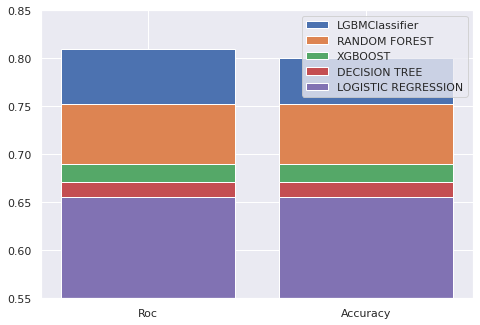

In [184]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Roc','Accuracy']
ax.bar(langs,lgbo,label ="LGBMClassifier")
ax.bar(langs,randomf,label ="RANDOM FOREST")
ax.bar(langs,xgbo,label ="XGBOOST")
ax.bar(langs,dtree,label = "DECISION TREE")
ax.bar(langs,lr,label ="LOGISTIC REGRESSION")
   

ax.set_ylim([0.55, 0.85])
plt.legend()


plt.show()